In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width: 100% !important; }</style>"))

## Importing Packages

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pylab
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA 
from scipy.stats.distributions import chi2
sns.set()

## Importing the data 

In [3]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [4]:
df_comp = raw_csv_data.copy()
df_comp

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.900000,2224.95,3445.980000,18124.01
1,10/01/1994,475.270000,2225.00,3440.580000,18443.44
2,11/01/1994,474.130000,2228.10,3413.770000,18485.25
3,12/01/1994,474.170000,2182.06,3372.020000,18793.88
4,13/01/1994,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...,...
6264,23/01/2018,2839.130362,13559.60,7731.827774,24124.15
6265,24/01/2018,2837.544008,13414.74,7643.428966,23940.78
6266,25/01/2018,2839.253031,13298.36,7615.839954,23669.49
6267,26/01/2018,2872.867839,13340.17,7665.541292,23631.88


In [5]:
df_comp.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,6269,6269,07/05/1999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
spx,6269,NaN,NaN,NaN,1288.13,487.586,438.92,990.672,1233.42,1459.99,2872.87
dax,6269,NaN,NaN,NaN,6080.06,2754.36,1911.7,4069.35,5773.34,7443.07,13559.6
ftse,6269,NaN,NaN,NaN,5422.71,1145.57,2876.6,4486.1,5662.43,6304.25,7778.64
nikkei,6269,NaN,NaN,NaN,14597.1,4043.12,7054.98,10709.3,15028.2,17860.5,24124.2


In [6]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Ploting the data

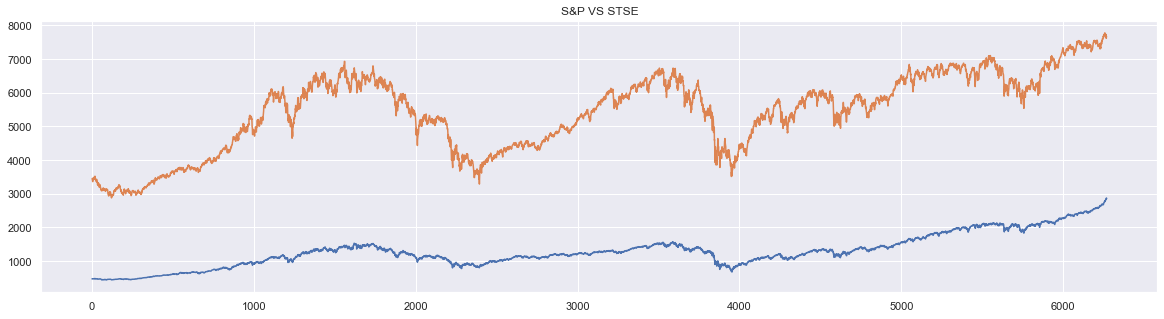

In [7]:
df_comp.spx.plot(figsize = (20,5),title='S&P500 Prices')
df_comp.ftse.plot(figsize = (20,5),title='FTSE100 Prices')
plt.title("S&P VS STSE");

## The QQ Plot

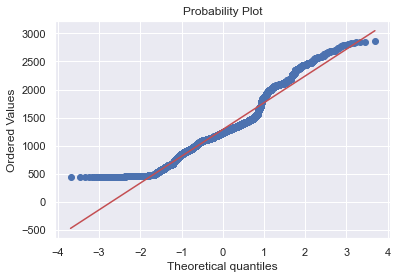

In [8]:
scipy.stats.probplot(df_comp.spx, plot=pylab);

## From Text to Date and Indexing

In [9]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)

In [10]:
df_comp.date.describe(datetime_is_numeric=False)

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

In [11]:
df_comp.set_index('date', inplace=True)
df_comp.head(3)

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


## Setting the data Frequency

In [12]:
df_comp = df_comp.asfreq('b') #Business Day
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling Missing Data

In [13]:
print(df_comp.isna().sum())
df_comp[df_comp.spx.isna()]

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64


,spx,dax,ftse,nikkei
date,,,,
2008-01-01,NaN,NaN,NaN,NaN
2009-01-01,NaN,NaN,NaN,NaN
2010-01-01,NaN,NaN,NaN,NaN
2013-01-01,NaN,NaN,NaN,NaN
2014-01-01,NaN,NaN,NaN,NaN
2015-01-01,NaN,NaN,NaN,NaN
2016-01-01,NaN,NaN,NaN,NaN
2018-01-01,NaN,NaN,NaN,NaN


In [14]:
df_comp.spx = df_comp.spx.fillna(method='ffill')
df_comp.dax = df_comp.dax.fillna(method='ffill')
df_comp.ftse = df_comp.ftse.fillna(method='bfill')
df_comp.nikkei = df_comp.nikkei.fillna(method = 'bfill')

In [15]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplyfying the dataset

In [16]:
df_comp['market_value'] = df_comp.spx
del df_comp['spx'], df_comp['dax'], df_comp['ftse'], df_comp['nikkei']

In [17]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting the data

In [18]:
size = int(len(df_comp)*0.8)
size

5021

In [19]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]
print(len(df), len(df_test))
print(df.tail(6)) 
print(df_test.head(6)) # Check the trail and head of train and test set respectively to varify that the split is correct

5021 1256
            market_value
date                    
2013-03-29   1569.185872
2013-04-01   1562.173837
2013-04-02   1570.252238
2013-04-03   1553.686978
2013-04-04   1559.979316
2013-04-05   1553.278930
            market_value
date                    
2013-04-08   1563.071269
2013-04-09   1568.607909
2013-04-10   1587.731827
2013-04-11   1593.369863
2013-04-12   1588.854623
2013-04-15   1552.363572


## White Noise

In [20]:
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))
wn

array([1304.64147016, 1374.77588513, 1109.6759135 , ...,  866.68706764,
        694.86383947,  857.87753235])

In [21]:
df['wn'] = wn
df.head(3) 

,market_value,wn
date,,
1994-01-07,469.90,1304.641470
1994-01-10,475.27,1374.775885
1994-01-11,474.13,1109.675914


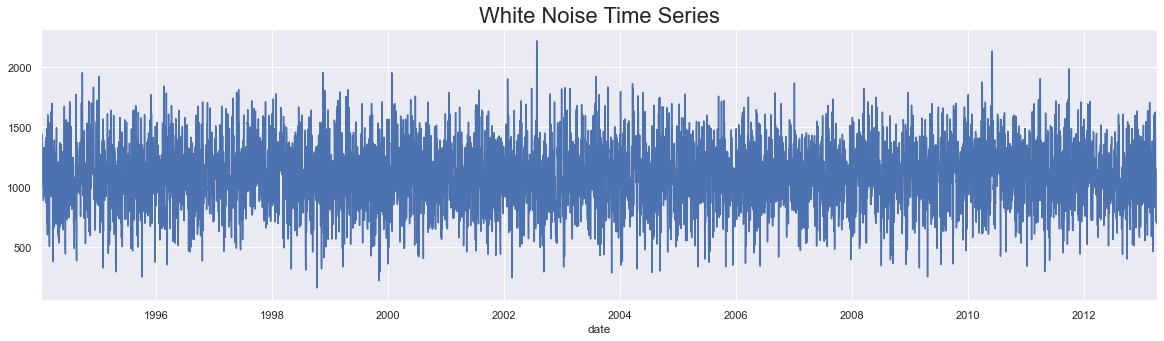

In [22]:
df.wn.plot(figsize=(20,5))
plt.title('White Noise Time Series', size = 22);

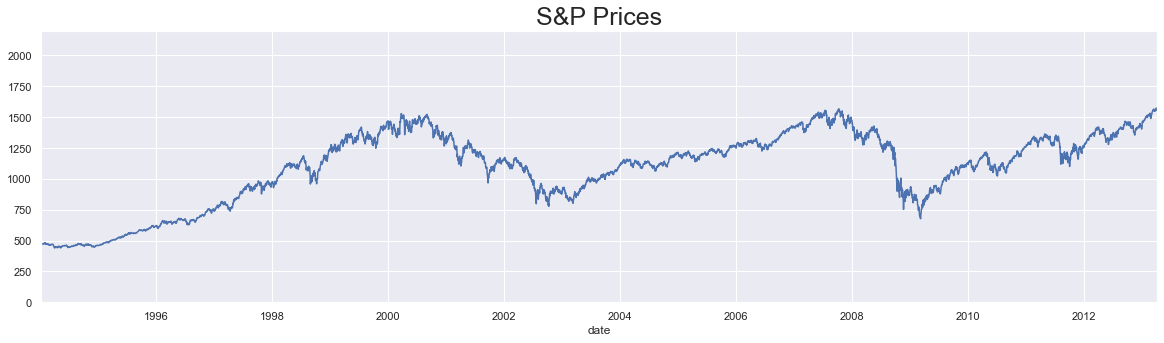

In [23]:
df.market_value.plot(figsize=(20,5))
plt.title('S&P Prices', size = 25)
plt.ylim(0,2200);

## Random Walk

In [24]:
rw = pd.read_csv('RandWalk.csv')
rw.date = pd.to_datetime(rw.date, dayfirst=True)
rw.set_index('date', inplace = True)
rw = rw.asfreq('b')
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [25]:
df['rw'] = rw.price
df.head(3)

,market_value,wn,rw
date,,,
1994-01-07,469.90,1304.641470,1122.139662
1994-01-10,475.27,1374.775885,1080.347860
1994-01-11,474.13,1109.675914,1082.095245


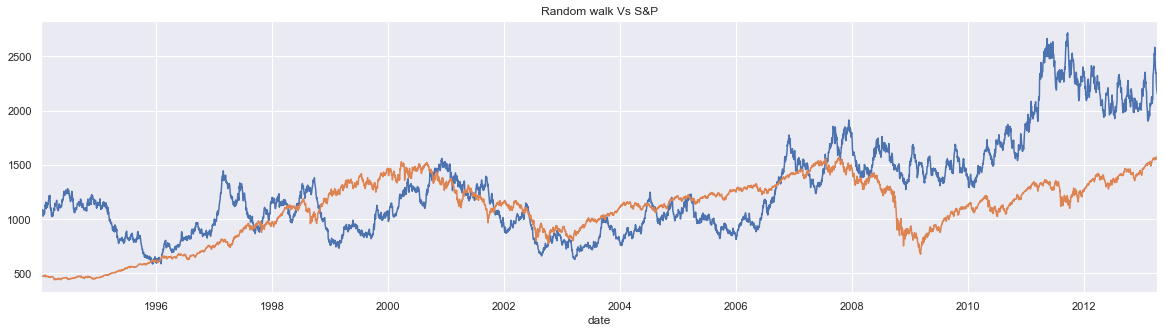

In [26]:
df.rw.plot(figsize=(20,5))
df.market_value.plot(figsize = (20,5))
plt.title("Random walk Vs S&P");

## Stationarity

In [27]:
adfuller(df.market_value)

(-1.7369847452352432,
 0.41216456967706244,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

In [28]:
adfuller(df.wn) # White noise is stationary as the p value

(-71.54529468390642,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70611.42856456028)

In [29]:
adfuller(df.rw) #Cosidering the p-value, there's more than 60% chance that the data has come from a non stationary process

(-1.328607392768972,
 0.6159849181617384,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

## Seasionality

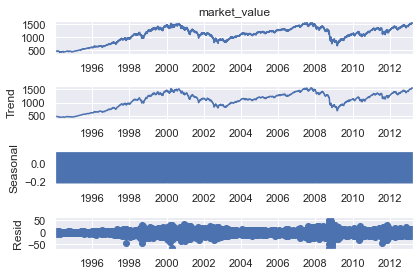

In [30]:
seasonal_decompose(df.market_value, model='additive').plot();

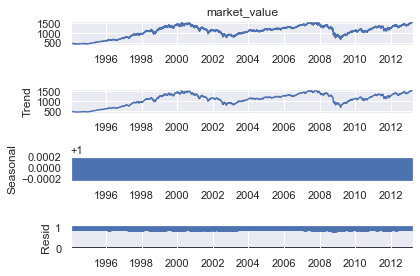

In [31]:
seasonal_decompose(df.market_value, model='multiplicative').plot(); #Seasional graph is changing in a way that it is kinda filling the whole space thus looks like a solid rectage

## ACF

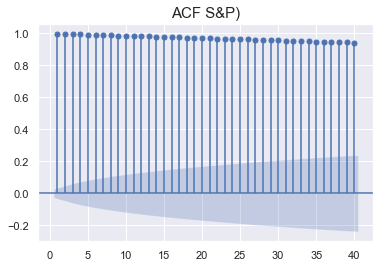

In [32]:
sgt.plot_acf(df.market_value, lags=40, zero=False)#zero = False as we dont to compare our first value with itself
plt.title("ACF S&P)", size=15);

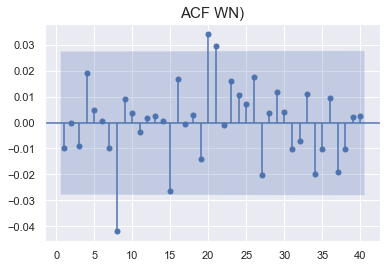

In [33]:
sgt.plot_acf(df.wn, lags=40, zero=False) # Np auto correlation
plt.title("ACF WN)", size=15);

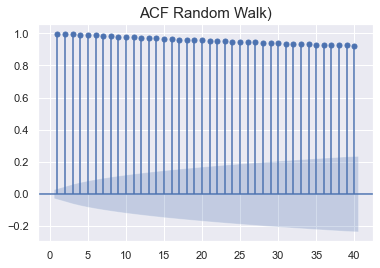

In [34]:
sgt.plot_acf(df.rw, lags=40, zero=False) # this also holds the auto correlation, a slightly less than the df.market_value though
plt.title("ACF Random Walk)", size=15);

## PACF

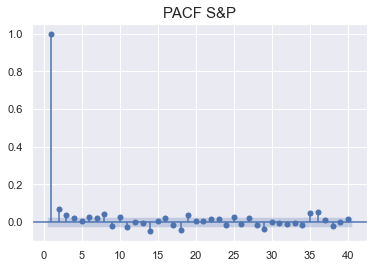

In [35]:
sgt.plot_pacf(df.market_value, lags = 40, zero=False, method=('ols')) #order of least squares 
plt.title("PACF S&P", size = 15);

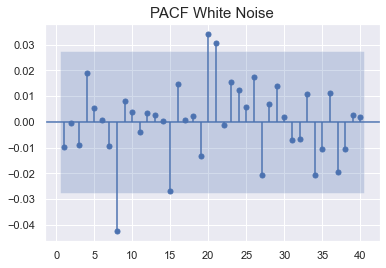

In [36]:
sgt.plot_pacf(df.wn, lags = 40, zero=False, method=('ols'))
plt.title("PACF White Noise", size = 15);

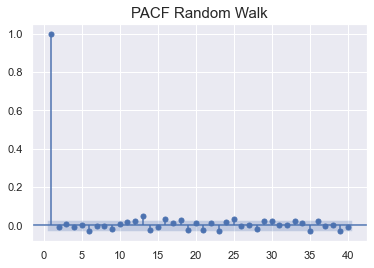

In [37]:
sgt.plot_pacf(df.rw, lags = 40, zero=False, method=('ols'))
plt.title("PACF Random Walk", size = 15);

## Pre-processing

In [38]:
df_comp = raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst= True )
df_comp.set_index('date', inplace=True)
df_comp = df_comp.asfreq('b')
df_comp = df_comp.fillna(method='ffill')
df_comp['market_value'] = df_comp.ftse
del df_comp['spx'], df_comp['dax'], df_comp['nikkei'], df_comp['ftse']

size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
df.shape, df_test.shape 

((5021, 1), (1256, 1))

## ACF

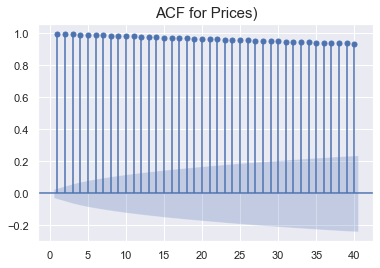

In [39]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title("ACF for Prices)", size=15);

## The PCAF

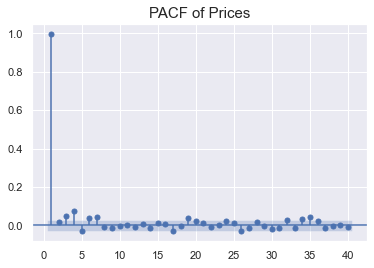

In [40]:
sgt.plot_pacf(df.market_value, lags = 40, alpha=0.05, zero=False, method=('ols'))
plt.title("PACF of Prices", size = 15);

## The AR Model

In [41]:
# Simple AR(1) Model
model_ar = ARMA(df.market_value, order = (1,0))
result_ar = model_ar.fit()
result_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(1, 0)   Log Likelihood              -27622.598
Method:                       css-mle   S.D. of innovations             59.258
Date:                Fri, 20 Aug 2021   AIC                          55251.197
Time:                        18:23:15   BIC                          55270.761
Sample:                    01-07-1994   HQIC                         55258.052
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5060.3836    486.434     10.403      0.000    4106.990    6013.777
ar.L1.market_value     0.9985      0.001   1298.792      0.000       0.997       1.000
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
-----------------------------------------------------------------------------
"""

In [42]:
# AR(2) Model
model_ar2 = ARMA(df.market_value, order = (2,0))
result_ar2 = model_ar2.fit()
result_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(2, 0)   Log Likelihood              -27621.871
Method:                       css-mle   S.D. of innovations             59.249
Date:                Fri, 20 Aug 2021   AIC                          55251.742
Time:                        18:23:16   BIC                          55277.827
Sample:                    01-07-1994   HQIC                         55260.883
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6402    495.692     10.268      0.000    4118.102    6061.178
ar.L1.market_value     0.9814      0.014     69.595      0.000       0.954       1.009
ar.L2.market_value     0.0171      0.014      1.211      0.226      -0.011       0.045
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0015           +0.0000j            1.0015            0.0000
AR.2          -58.4626           +0.0000j           58.4626            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
# AR(3) Model
model_ar3 = ARMA(df.market_value, order = (3,0))
result_ar3 = model_ar3.fit()
print(result_ar3.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(3, 0)   Log Likelihood              -27616.089
Method:                       css-mle   S.D. of innovations             59.180
Date:                Fri, 20 Aug 2021   AIC                          55242.178
Time:                        18:23:17   BIC                          55274.785
Sample:                    01-07-1994   HQIC                         55253.604
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5395.8691    707.034      7.632      0.000    4010.108    6781.630
ar.L1.market_value     0.9806      0.014     69.645      0.000       0.953       1.008
ar.L2.market_value  

In [49]:
# AR(4) Model
model_ar4 = ARMA(df.market_value, order = (4,0))
result_ar4 = model_ar4.fit()
print(result_ar4.summary())

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(4, 0)   Log Likelihood              -27602.755
Method:                       css-mle   S.D. of innovations             59.023
Date:                Fri, 20 Aug 2021   AIC                          55217.510
Time:                        18:24:38   BIC                          55256.639
Sample:                    01-07-1994   HQIC                         55231.221
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5392.0052    754.851      7.143      0.000    3912.524    6871.486
ar.L1.market_value     0.9770      0.014     69.533      0.000       0.949       1.005
ar.L2.market_value  

## LLR Test

In [50]:
def LLR_Test(mod_1, mod_2, DF=1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

## Comparing Higher lag AR Models

In [51]:
LLR_Test(model_ar2, model_ar3) #The value is significant, this suggests that we should go for the more complicated model

0.001

In [52]:
LLR_Test(model_ar3, model_ar4) # Complex models are showing significant results, let's experiment further

0.0

In [53]:
model_ar7 = ARMA(df.market_value, order = (7,0))  # It shows the significant result
result_ar7 = model_ar7.fit() 
print(result_ar7.summary())
print(f"LLR Test p-value : {LLR_Test(model_ar4, model_ar7, DF=3)}")

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(7, 0)   Log Likelihood              -27591.900
Method:                       css-mle   S.D. of innovations             58.896
Date:                Fri, 20 Aug 2021   AIC                          55201.799
Time:                        18:25:01   BIC                          55260.492
Sample:                    01-07-1994   HQIC                         55222.366
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    589.612      8.632      0.000    3934.023    6245.260
ar.L1.market_value     0.9786      0.014     69.518      0.000       0.951       1.006
ar.L2.market_value  

In [54]:
model_ar8 = ARMA(df.market_value, order = (8,0))
result_ar8 = model_ar8.fit() 
print(result_ar8.summary())
print(f"LLR Test p-value : {LLR_Test(model_ar7, model_ar8)}") #The value is greater than 0.05, hence the result is not significant, We will not include the 8th point

                              ARMA Model Results                              
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(8, 0)   Log Likelihood              -27591.739
Method:                       css-mle   S.D. of innovations             58.894
Date:                Fri, 20 Aug 2021   AIC                          55203.478
Time:                        18:25:23   BIC                          55268.692
Sample:                    01-07-1994   HQIC                         55226.329
                         - 04-05-2013                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.6413    584.995      8.700      0.000    3943.072    6236.211
ar.L1.market_value     0.9790      0.014     69.476      0.000       0.951       1.007
ar.L2.market_value  

In [55]:
print(f"LLR Test p-value : {LLR_Test(model_ar, model_ar7, DF=6)}") # So we will include the prices in the model only 7 periods ago DF=>Degree of freedom

LLR Test p-value : 0.0


This is data is extracted from a **Non-Stationary** source.we can varify it using `Dickey-Fuller` Test.`AR Models` won't perform best with such data
If the data is not stationary we will have to transform the data to meet the stationary assuptions

In [56]:
adfuller(df.market_value) #p-value is greater than 0.05 which means that the data is comming from a non-stationary source

(-1.904155141883684,
 0.33010893277028447,
 6,
 5014,
 {'1%': -3.4316548765428174,
  '5%': -2.8621166146845334,
  '10%': -2.5670769326348926},
 54854.15304507557)

Let's try to make our data stationary by using the concept of **Returns**

## Using Returns

$$ Return = \frac{P_t - P_{t-1}}{P_{t-1}}*100 $$

In [60]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:] # have to start from the first index to calculate the change as there will be no previous value for the 0th index
df 

,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


In [63]:
adfuller(df.returns) #To check if the data is stationary #Which shows that it is stationary

(-12.770265719497287,
 7.798058336036539e-24,
 32,
 4987,
 {'1%': -3.431661944885779,
  '5%': -2.8621197374408225,
  '10%': -2.5670785949998973},
 15696.7672456975)

## ACF(Acuto Correlation Function) and PACF(Partial Auto Correlation Function) for Returns

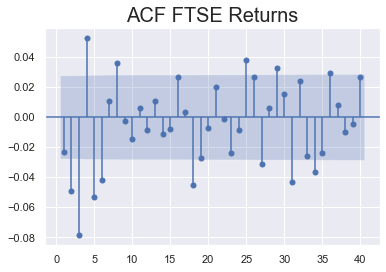

In [66]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title("ACF FTSE Returns", size=20)
plt.show() #As this has some -ve and +ve consective values so there might be natural adjustment happening in the market

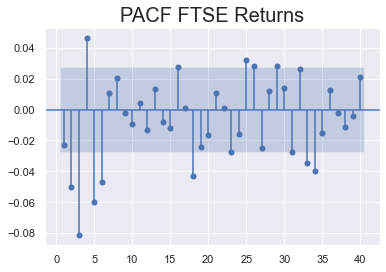

In [68]:
sgt.plot_pacf(df.returns, lags=40, zero=False)
plt.title("PACF FTSE Returns", size=20)
plt.show()

## AR for Returns 

Now, let's try simple AR Model to predict the feature trend